# Hotel Review Sentiment Analysis with Deep Learning

Library

In [ ]:
!pip -q install PySastrawi


In [5]:
# Standard Library
import string
import re

#Third Party  Library
import numpy as np
import pandas as pd
import seaborn as sn
import nltk 
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# import gradio as gr
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 1000)  
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
#from transformers import pipeline
#from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# !git clone https://github.com/rakkaalhazimi/Data-NLP-Bahasa-Indonesia.git

Cloning into 'Data-NLP-Bahasa-Indonesia'...


In [6]:
df = pd.read_csv("Data-NLP-Bahasa-Indonesia/review_hotel.csv")

In [7]:
df.head()

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk tidak diganti,",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


In [ ]:
df.shape

(14856, 3)

In [ ]:
df.category.value_counts()

0    12839
1     2017
Name: category, dtype: int64

In [8]:
df["review_text"].str.findall("(<.*?>)").explode().value_counts()

Series([], Name: review_text, dtype: int64)

In [10]:
df["review_text"].str.findall("(:\S+)").explode().value_counts()

:(                         145
:)                          42
:00                         16
:((                          8
:'(                          4
:49                          3
:))                          2
:p                           2
:15                          2
:30                          2
:00,                         2
:v                           2
:00.                         2
:(((                         2
:"                           1
:wastafel                    1
:((..                        1
:di                          1
:09)                         1
:30-20.00                    1
:-)                          1
:kamar                       1
:),                          1
:00an.                       1
://youtu.be/6t2Hqf0-HuU      1
:')                          1
:(((((((                     1
::                           1
:P                           1
:;                           1
:-                           1
:57                          1
:55     

In [11]:
  df["review_text"].str.findall("\w+!").explode().value_counts()

banget!          9
kecewa!          9
mengecewakan!    8
bad!             7
recommended!     7
                ..
gmn!             1
affordable!      1
EVER!            1
parrah!          1
Menyebalkan!     1
Name: review_text, Length: 286, dtype: int64

C:\Users\garci\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='category', ylabel='count'>

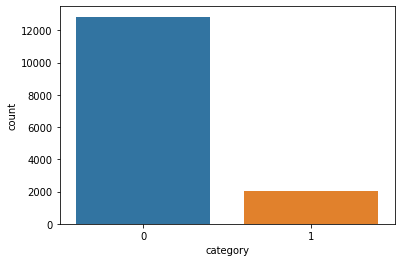

In [12]:
sn.countplot(df['category'])

### Unbalanced Category between Positif and Negatif Review

In [13]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
def wordcloud(df, label):
    subset=df[df[label]==1]
    text=subset.review_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# Visualising the subset datasets using wordcloud   

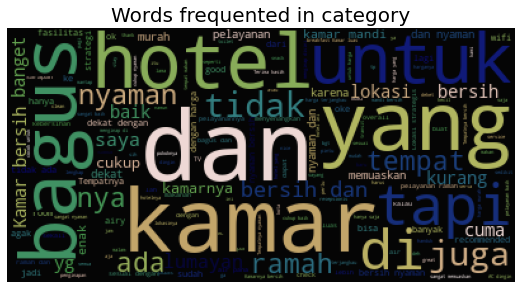

In [ ]:
wordcloud(df,'category')

## Data Preprocessing

In [14]:
punctuations = re.sub(r"[!<_>#:)\.]", "", string.punctuation)

def punct2wspace(text):
    return re.sub(r"[{}]+".format(punctuations), " ", text)

def normalize_wspace(text):
    return re.sub(r"\s+", " ", text)

def casefolding(text):
    return text.lower()


In [15]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [16]:
def preprocess_text(text):
    text = punct2wspace(text)
    text = normalize_wspace(text)
    text = casefolding(text)
    text= stemmer.stem(text)
    return text


In [17]:
df["cleaned_text"] = df["review_text"].apply(preprocess_text)
df.head()

,review_id,review_text,category,cleaned_text
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.",1,inap rapi bersih suasana tenang layan ramah dan banyak bantu lokasi cukup dekat ke beberapa obyek wisata kalau saya ke bandung lagi mungkin saya akan inap lagi di sini
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai",0,wifi tidak sampai kamar tidak sedia heater untuk kopi teh atau dispenser dan tidak sedia kursi di depan kamar untuk rokok hingga harus duduk di lantai
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..",0,lantai kamar mandi kotor bau dan seperti sdh jdi sarang nyamuk kamar mandi pesan superior double yg kasih twin mungkin karena murah saya maklumin tpi depan mohon untuk bisa jdi baik untuk bisa lbh baik lg
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk tidak diganti,",0,wc jorok kasur tidak bersih handuk tidak ganti
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,bocor lagi


In [19]:
cleaned_text = df["cleaned_text"]

In [20]:
target = df["category"]
features = df["cleaned_text"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

### Pipeline

In [22]:
BATCH_SIZE = 32

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Terapkan shuffle, batch dan prefetch pada dataset
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [24]:
for feat, tar in train_dataset.take(1):
    print(feat[:3])
    print(tar[:3])

tf.Tensor(
[b'lantai kamar mandi dan lanta kamar kurang bersih asa licin'
 b'kamar oke lokasi oke tp sarap kurang enak' b'bad place'], shape=(3,), dtype=string)
tf.Tensor([0 0 0], shape=(3,), dtype=int64)


In [25]:
max_features = 10000      # Jumlah kosakata
embedding_dim = 16  

In [26]:
# Buat text vectorizer
encoder = keras.layers.TextVectorization(max_tokens=max_features)

# Latih tokenizer pada data teks
encoder.adapt(train_dataset.map(lambda feat, tar: feat))

In [27]:
encoder(feat)[:3]

<tf.Tensor: shape=(3, 47), dtype=int64, numpy=
array([[  64,    2,    8,    4, 3730,    2,    7,   10,  322,  556,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   2,  126,   75,  126,   73,   69,    7,  117,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 245,  507,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

In [29]:
# Buat model sequential (berurutan)
model = keras.Sequential()
model.add(encoder)
model.add(keras.layers.Embedding(
    input_dim=len(encoder.get_vocabulary()), 
    output_dim=embedding_dim, 
    mask_zero=True)
)
model.add(keras.layers.LSTM(16, return_sequences=True))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Tentukan loss, optimizer dan metrik yang akan digunakan
model.compile(loss="binary_crossentropy", 
              optimizer="rmsprop",
              metrics=["acc"])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 16)          148736    
                                                                 
 lstm (LSTM)                 (None, None, 16)          2112      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                        

In [31]:
# Melihat Diagram Model
keras.utils.vis_utils.plot_model(model, "model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [32]:
# Melatih model
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
349/349 [==============================] - 96s 192ms/step - loss: 0.2933 - acc: 0.9083 - val_loss: 0.1842 - val_acc: 0.9448
Epoch 2/10
349/349 [==============================] - 49s 141ms/step - loss: 0.1828 - acc: 0.9448 - val_loss: 0.1642 - val_acc: 0.9496
Epoch 3/10
349/349 [==============================] - 48s 138ms/step - loss: 0.1609 - acc: 0.9495 - val_loss: 0.1601 - val_acc: 0.9502
Epoch 4/10
349/349 [==============================] - 48s 138ms/step - loss: 0.1491 - acc: 0.9531 - val_loss: 0.1634 - val_acc: 0.9499
Epoch 5/10
349/349 [==============================] - 48s 137ms/step - loss: 0.1378 - acc: 0.9564 - val_loss: 0.1649 - val_acc: 0.9507
Epoch 6/10
349/349 [==============================] - 54s 154ms/step - loss: 0.1304 - acc: 0.9573 - val_loss: 0.1637 - val_acc: 0.9529
Epoch 7/10
349/349 [==============================] - 58s 165ms/step - loss: 0.1240 - acc: 0.9593 - val_loss: 0.1677 - val_acc: 0.9502
Epoch 8/10
349/349 [==============================] - 5

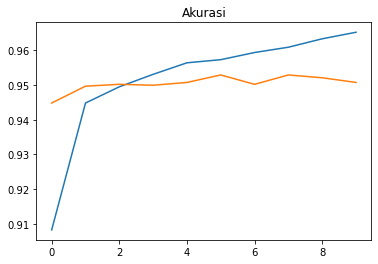

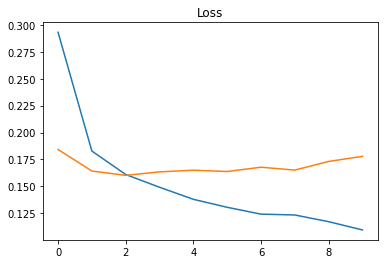

In [34]:
plt.figure()
plt.title("Akurasi")
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

plt.figure()
plt.title("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.show()

In [35]:
contoh_review = ["kamarnya sangat jelek"]
prediksi = model.predict(contoh_review) # Probabilitas
prediksi.squeeze()

array(0.02997911, dtype=float32)

In [36]:
contoh_review = ["kamarnya bagus bersih dan rapi"]
prediksi = model.predict(contoh_review) # Probabilitas
prediksi.squeeze()

array(0.9977432, dtype=float32)

In [38]:
model.save('hotel_model')

INFO:tensorflow:Assets written to: hotel_model\assets


INFO:tensorflow:Assets written to: hotel_model\assets


In [39]:
new_model = tf.keras.models.load_model("hotel_model")

In [41]:
new_model.predict(contoh_review)

array([[0.9977432]], dtype=float32)